In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Procesamiento de datos

In [2]:
datos = pd.read_csv ("full_data.csv")


1. Del dataFrfame "datos" nos quedamos solo con las columnas:
- station id,
- num bikes available,
- num bikes disabled,
- num docks available,
- num docks disabled,
- Date,
- hora,
- dia.

In [4]:
# Para que sea mas prolijo, creamos primero una lista de las columnas que queremos obtener del df "datos"
columnas_seleccionadas = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_seleccionadas].copy()
#Vamos a ver si se guardo correctamente el nuevo dataframe, para ello usamos el método head para darle un vistazo a las primeras filas
datos_limpios.head()

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


2. Pasamos todos los nombres de columna a español utilizando un diccionario. Los nuevos nombres
serán:
- estacion,
- bicis disponibles
- bicis rotas,
- puertos disponibles,
- puertos rotos,
- fecha,
- horario,
- dia semana.

Para esto primero definimos un diccionario donde las claves son los nombres de las columnas a modificar y el valor los nuevos nombres,
luego usamos el método rename de pandas para modificar las columnas antes nombradas, como se muestra a continuación.

In [5]:
# Definimos un diccionario para traducir los nombres:

diccionario_Traducción = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

# Aplicamos la traducción:
datos_limpios = datos_limpios.rename(columns=diccionario_Traducción)

In [6]:
# damos un vistazo de como quedó el archivo con este cambio
datos_limpios.columns
#los cambios se aplicaron con exito

Index(['estacion', 'bicis_disponibles', 'bicis_rotas', 'puertos_disponibles',
       'puertos_rotos', 'fecha', 'horario', 'dia_semana'],
      dtype='object')

3. Ahora vamos a traducir los dias de la columna "dia_semana" al español utilizando un diccionario, con la misma idea de antes, simplemente que por un tema de eficiencia vamos a utilizar la función "map" y no "replace"

In [7]:
# Definimos un diccionario para traducir los días:

diccionario_Dias = {
    "Monday" : "Lunes",
    "Tuesday" : "Martes",
    "Wednesday" : "Miercoles",
    "Thursday" : "Jueves",
    "Friday" : "Viernes",
    "Saturday" : "Sabado",
    "Sunday" : "Domingo"
}
# Aplicamos la traducción:

datos_limpios["dia_semana"] = datos_limpios["dia_semana"].map(diccionario_Dias)

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes
2,420,5,1,6,1,2025-04-29,00:32:59,Martes
3,464,11,2,7,0,2025-04-29,00:32:59,Martes
4,420,5,1,6,1,2025-04-29,01:13:46,Martes


4. Miramos que tipo de datos contiene nuestro DataFrame, a continuacion se muestra dos formas de hacerlo, donde la primera
  vemos por columna y la segunda, más compacta , nos muestra una lista donde cada elemento es el un tipo de dato dentro del df

In [8]:
print(datos_limpios.dtypes)

# Una lista con los tipos de datos. Tengo Enteros (Int64) y Objects (O):

list(datos_limpios.dtypes.unique())

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object


[dtype('int64'), dtype('O')]

5. Veremos a continuacion si el df contiene datso faltantes, usamos los métodos encademanados isna y luego sum,
   donde el primer método mira si una posicion falta el dato o no,se crea una mascara sobre las posiciones con True si falta el dato o False en caso  contrario,luego sum suma los valores booleanos, donde a True los interpreta como 1 y 0 a False

In [9]:
total_faltantes = datos_limpios.isna().sum().sum()
print("La cantidad de datos faltantes del df 'datos_limpios' es :",total_faltantes)


La cantidad de datos faltantes del df 'datos_limpios' es : 0


6. (Hecho con el método de 7)

Los datos de fechas y hora son bastante complejos de manejar. Una forma bastante simple que utilizamos
para manejar estos tipos es generar las variables "anio", "mes", "dia" y "hora" extrayendo la información
consecuente de los strings de "fecha" y "horario". Luego verificamos que las variables resultantes son
numéricas.


In [10]:
# Convertimos los datos a formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])



C:\Users\ncorr\AppData\Local\Temp\ipykernel_23032\1400464593.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])


In [11]:
# Extraemos variables numéricas

datos_limpios["anio"] = datos_limpios["fecha"].dt.year
datos_limpios["mes"] = datos_limpios["fecha"].dt.month
datos_limpios["dia"] = datos_limpios["fecha"].dt.day
datos_limpios["hora"] = datos_limpios["horario"].dt.hour

In [12]:
# Verificamos tipos de datos:
datos_limpios[["anio", "mes", "dia", "hora"]].dtypes

anio    int32
mes     int32
dia     int32
hora    int32
dtype: object

In [13]:
# La fecha en formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])

# Horario a tipo hora (time):

datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time

# Verificamos los tipos de datos:

datos_limpios[["fecha", "horario"]].dtypes

fecha      datetime64[ns]
horario            object
dtype: object

8. Implementamos la función llamada "determinar_estacion_anio" que permite construir una variable llamada "estacion_anio" al pasarle nuestros datos. La variable está construida a partir de las variables "dia" y "mes".




In [14]:

# Usamos estas fechas:  Verano 21 dic a 20 mar ; Otoño 21 mar a 20 jun ; Invierno 21 jun a 20 sep ; Primavera 21 sep a 20 dic.

# A partir de día y mes:

def determinar_estacion_anio(df):

    mes = df["mes"]
    dia = df["dia"]

    condiciones = [
        # Verano: 21 dic – 20 mar
        ((mes == 12) & (dia >= 21)) |
        (mes.isin([1, 2])) |
        ((mes == 3) & (dia <= 20)),

        # Otoño: 21 mar – 20 jun
        ((mes == 3) & (dia >= 21)) |
        (mes.isin([4, 5])) |
        ((mes == 6) & (dia <= 20)),

        # Invierno: 21 jun – 20 sep
        ((mes == 6) & (dia >= 21)) |
        (mes.isin([7, 8])) |
        ((mes == 9) & (dia <= 20)),

        # Primavera: 21 sep – 20 dic
        ((mes == 9) & (dia >= 21)) |
        (mes.isin([10, 11])) |
        ((mes == 12) & (dia <= 20))
    ]

    estaciones = ["Verano", "Otoño", "Invierno", "Primavera"]


    df["estacion_anio"] = np.select(condiciones, estaciones, default="Sin estacion")


    return df

In [15]:
# Aplicamos la función:

datos_limpios = determinar_estacion_anio(datos_limpios)

# Verificamos:

print(datos_limpios["estacion_anio"].unique()) #para mirar las categorías que contiene esta columna

print(datos_limpios["estacion_anio"].value_counts())

# Se implementó la función `determinar_estacion_anio` para clasificar cada observación según la estación del año.
#La clasificación se realizó utilizando las variables `mes` y `dia`, considerando las fechas de cambio de estación en Argentina.

['Otoño' 'Invierno' 'Primavera' 'Verano']
estacion_anio
Primavera    4078
Invierno     4036
Otoño        2380
Verano       2034
Name: count, dtype: int64


# Análisis descriptivo

In [16]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


9. A continuacion generamos un nuevo dataFrame llamado "datos_agrupados" que contiene la cantidad de bicis disponibles, la cantidad de bicis rotas
    ,la cantidad de puertos disponibles en toda Ciudad universitaria, es decir sumando estas cantidades de ambas estaciones,
   además conservando las columnas "fecha", "hora", "dia_semana", "dia", "mes" y "anio".

In [17]:
datos_agrupados = (
    datos_limpios
    .groupby(["fecha", "hora", "dia_semana", "dia", "mes", "anio"], as_index=False)
    [["bicis_disponibles","bicis_rotas","puertos_disponibles"]] #con esto declaramos a que columna le queremos aplicar la funcion 'sum'
    .agg("sum")
)


In [18]:
# Renombramos para que quede más claro
nuevos_nombres={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
}
datos_agrupados = datos_agrupados.rename(columns=nuevos_nombres)

# Verificamos:

datos_agrupados.head()


,fecha,hora,dia_semana,dia,mes,anio,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles
0,2025-04-28,23,Lunes,28,4,2025,14,3,15
1,2025-04-29,0,Martes,29,4,2025,16,3,13
2,2025-04-29,1,Martes,29,4,2025,16,3,13
3,2025-04-29,2,Martes,29,4,2025,16,3,13
4,2025-04-29,3,Martes,29,4,2025,16,3,13


10. A continuación vamos a crear un nuevo dataframe llamado "datos_por_temporada", en este podremos ver la cantidad total de bicis
    y puertos disponibles, tambien la cantidad de bicis rotas por temporada del año.

In [19]:
datos_por_temporada=(
    determinar_estacion_anio(datos_agrupados)
    .groupby("estacion_anio",as_index=False)
    .agg({"cantidad_bicis_disponibles":"sum","cantidad_puertos_disponibles":"sum","cantidad_bicis_rotas":"sum"})
)

In [20]:
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas
0,Invierno,23765,36356,4435
1,Otoño,14411,20701,2745
2,Primavera,9961,49238,6049
3,Verano,8792,21147,2605


 Ahora le agregamos una nueva columna al df que nos da cuenta de la capacidad total de bicis por temporada, sin contar la 
 cantidad de bicis rotas

In [21]:
datos_por_temporada["capacidad_total_bicis_utilizables"]=datos_por_temporada["cantidad_bicis_disponibles"]+datos_por_temporada["cantidad_puertos_disponibles"]
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas,capacidad_total_bicis_utilizables
0,Invierno,23765,36356,4435,60121
1,Otoño,14411,20701,2745,35112
2,Primavera,9961,49238,6049,59199
3,Verano,8792,21147,2605,29939


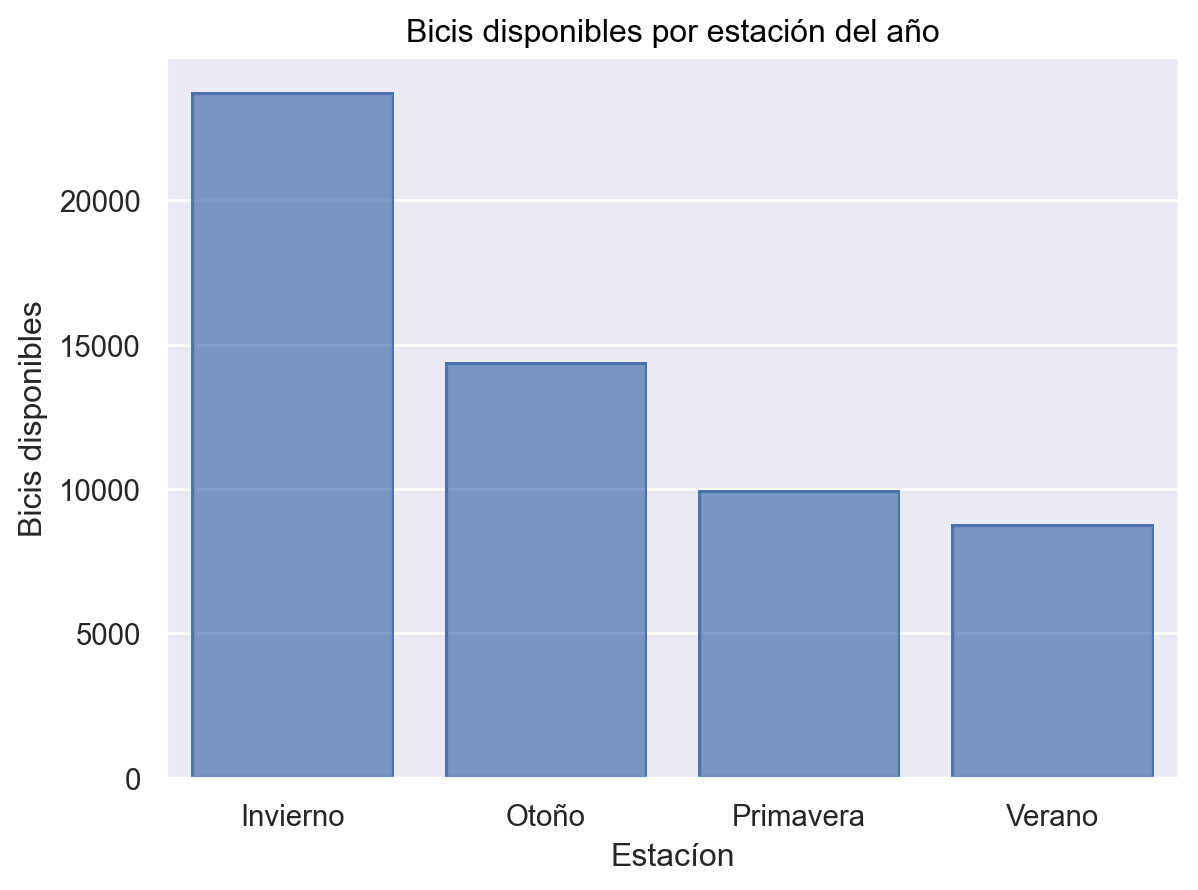

In [22]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Bicis disponibles")
)

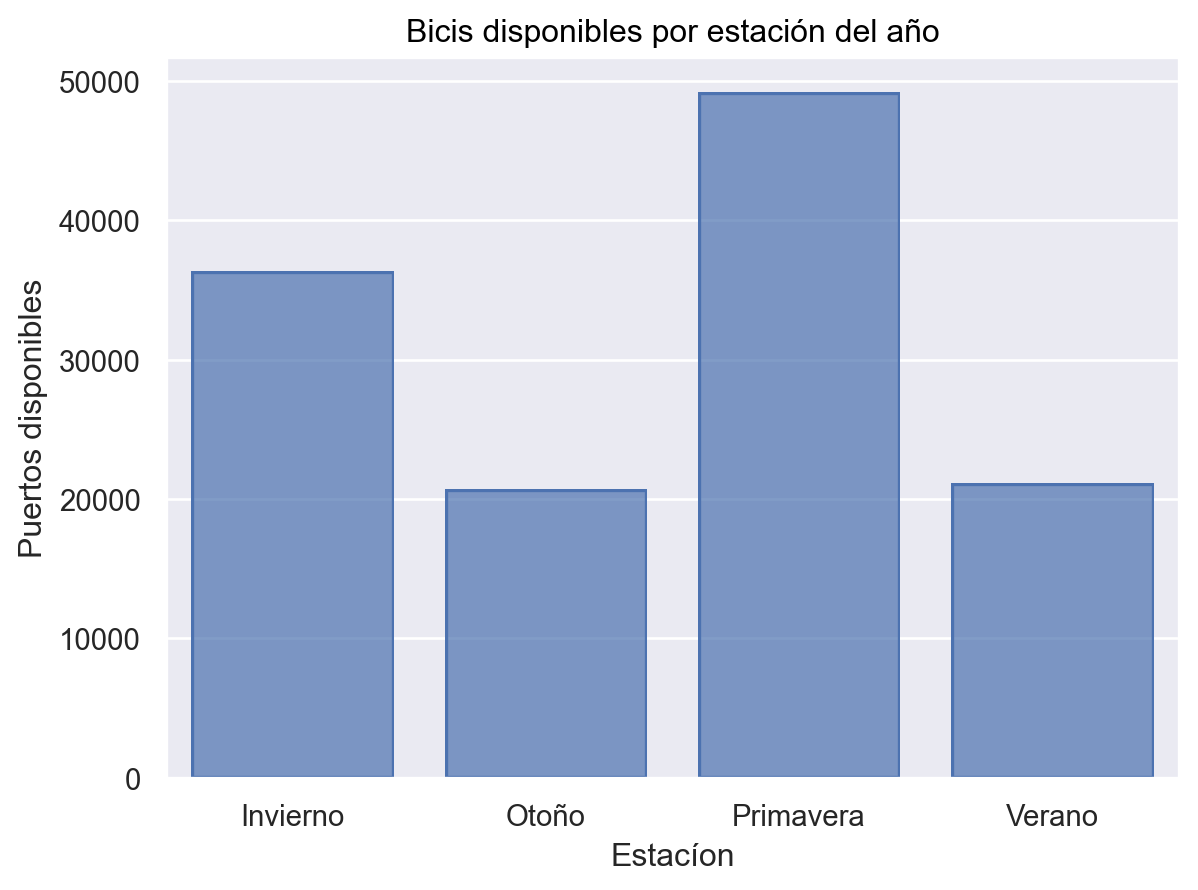

In [142]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_puertos_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Puertos disponibles")
)

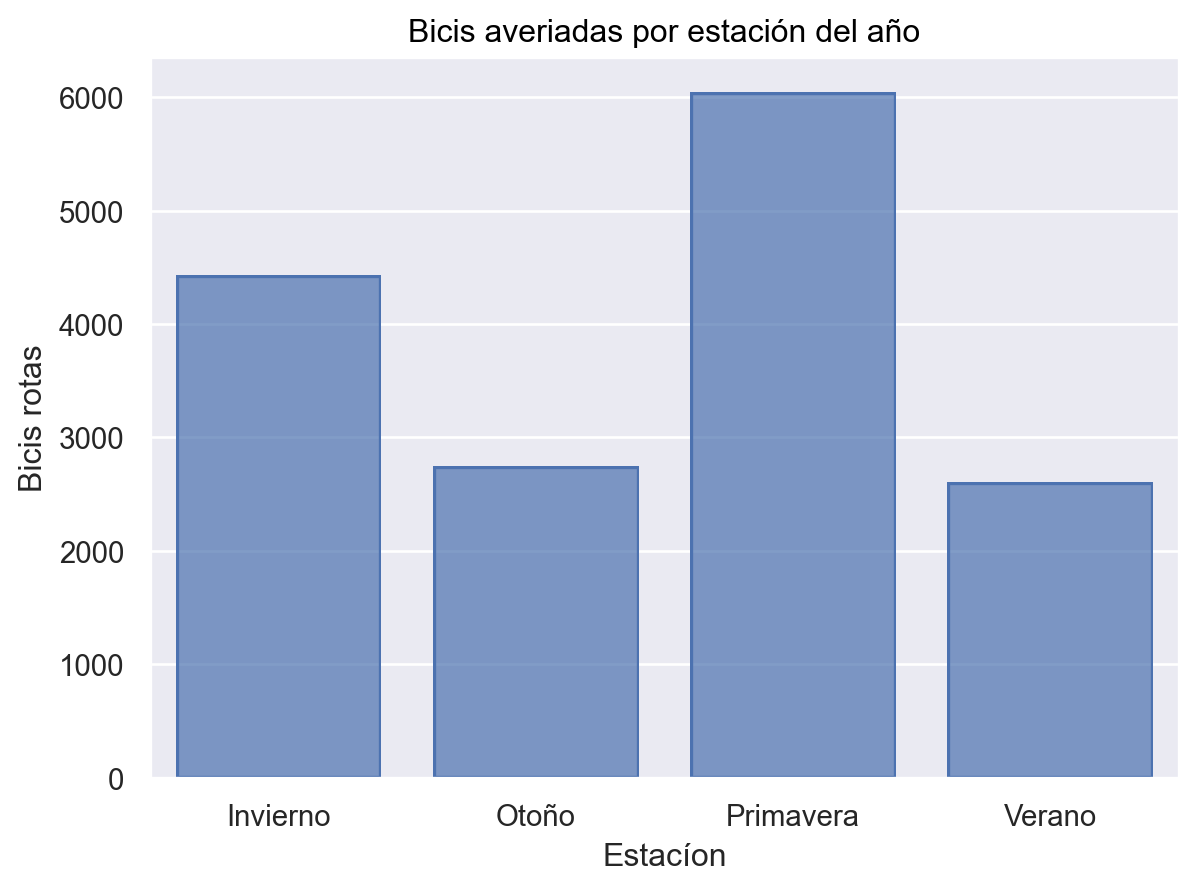

In [23]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_rotas")
    .add(so.Bar())
    .label(title="Bicis averiadas por estación del año",x="Estacíon",y="Bicis rotas")
)

11. A continuacion veremos como varia la cantidad promedio de bicis y
    puertos disponibles por hora y dia de la semanaa?

In [24]:
cantidades_promedios=(datos_agrupados
      .groupby(["dia_semana","hora"],as_index=False)
      [["cantidad_puertos_disponibles","cantidad_bicis_disponibles"]]
      .agg("mean").round())
#ahora le cambiamos el nombre de las columnas
nuevos_nombres=(
    {"cantidad_puertos_disponibles":"cantidad_puertos_disponibles(promedio)","cantidad_bicis_disponibles":"cantidad_bicis_disponibles(promedio)"}
)
cantidades_promedios=cantidades_promedios.rename(columns=nuevos_nombres)


In [25]:
cantidades_promedios

,dia_semana,hora,cantidad_puertos_disponibles(promedio),cantidad_bicis_disponibles(promedio)
0,Domingo,0,21.0,8.0
1,Domingo,1,21.0,8.0
2,Domingo,2,21.0,9.0
3,Domingo,3,21.0,8.0
4,Domingo,4,21.0,9.0
...,...,...,...,...
163,Viernes,19,20.0,9.0
164,Viernes,20,20.0,9.0
165,Viernes,21,23.0,6.0
166,Viernes,22,16.0,13.0


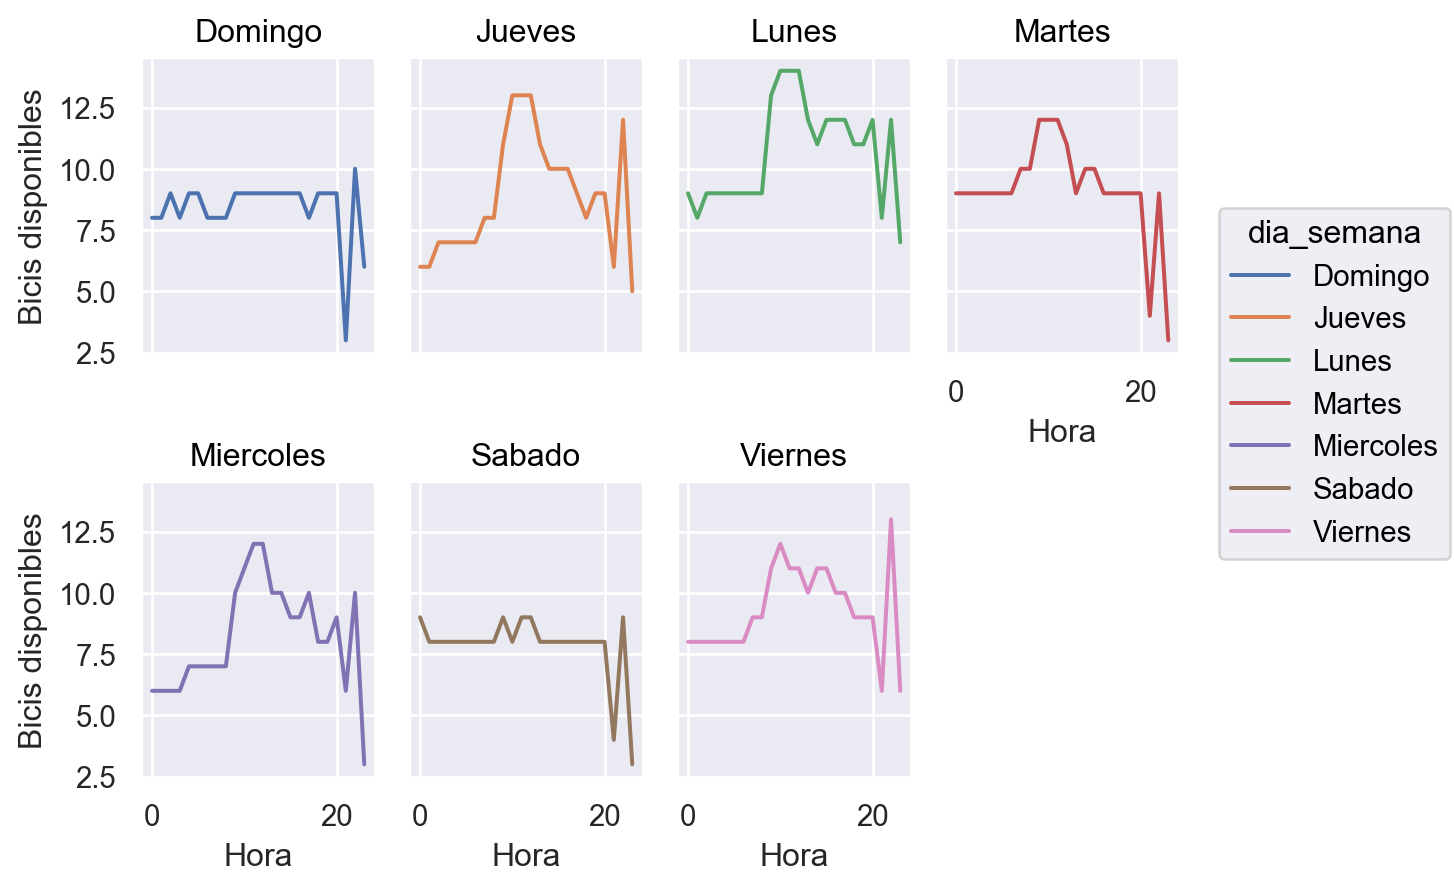

In [27]:
(
    so.Plot(cantidades_promedios,"hora","cantidad_bicis_disponibles(promedio)",color="dia_semana")
    .facet(col="dia_semana", wrap=4) #esto es para que me muestre 4 gráficos separados y luego cambie de linea
    .add(so.Line())
    .label(x="Hora",y="Bicis disponibles")
)


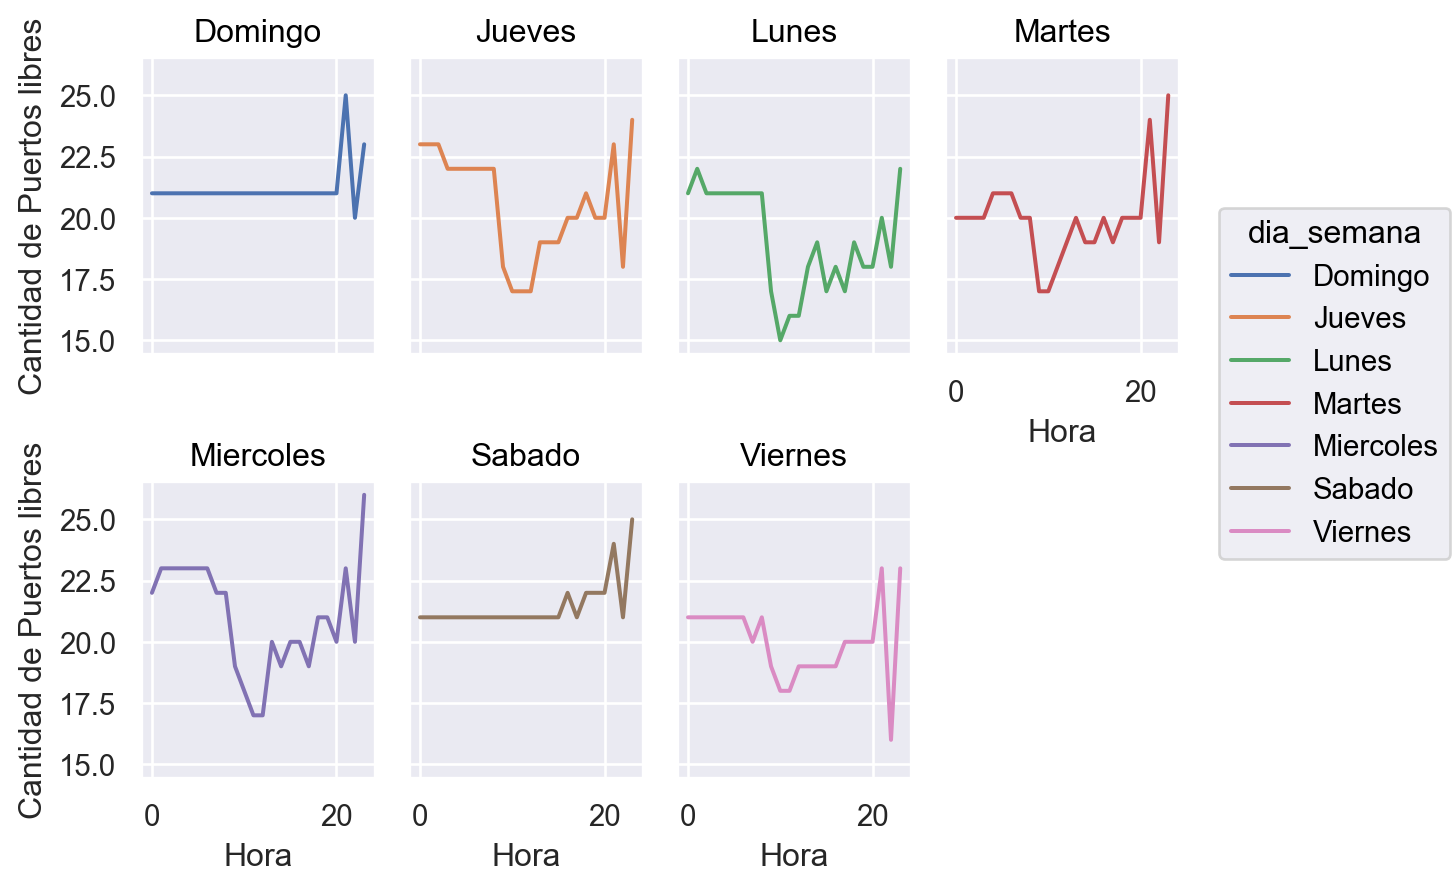

In [36]:
(
    so.Plot(data = cantidades_promedios,x = "hora", y = "cantidad_puertos_disponibles(promedio)",color="dia_semana")
    .facet(col="dia_semana", wrap=4)
    .add(so.Line())
    .label(x="Hora",y="Cantidad de Puertos libres")
)